In [47]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sex = {0: "m", 1: "f"}
group1 = {}
group2 = {}
CANDIDATES = {"candidate1":{"sex":0, "age":58, "pol_ex_years":5}, 
              "candidate2":{"sex":1, "age":61, "pol_ex_years":15}, 
              "candidate3":{"sex":0, "age":61, "pol_ex_years":15}, 
              "candidate4":{"sex":1, "age":58, "pol_ex_years":5},
            }

In [3]:
for candidate in CANDIDATES:
    #print(candidate +": "+CANDIDATES[candidate]["sex"] + "("+ str(CANDIDATES[candidate]["age"])+")")
    print(candidate, CANDIDATES[candidate])

candidate1 {'sex': 0, 'age': 58, 'pol_ex_years': 5}
candidate2 {'sex': 1, 'age': 61, 'pol_ex_years': 15}
candidate3 {'sex': 0, 'age': 61, 'pol_ex_years': 15}
candidate4 {'sex': 1, 'age': 58, 'pol_ex_years': 5}


In [4]:
# Set bias of groups 

    # Group1 without anti bias -> stronger sex bias
bias_weights_group1 = {"sex":(-5), "age":0, "pol_ex_years":1}
    
    # Group2 with anti bias -> no sex bias
bias_weights_group2 = {"sex":0, "age":0, "pol_ex_years":1}

In [5]:
# Set candidate bias Group 1
bias_scores_group1 = {"candidate1":{},
                      "candidate2":{},
                      "candidate3":{},
                      "candidate4":{}}
for candidate in CANDIDATES:
    bias_scores_group1[candidate] = (bias_weights_group1["sex"]*CANDIDATES[candidate]["sex"]+
                                                   bias_weights_group1["age"]*CANDIDATES[candidate]["age"]+
                                                   bias_weights_group1["pol_ex_years"]*CANDIDATES[candidate]["pol_ex_years"])
print("Group 1 bias scores")
for candidate in bias_scores_group1:
    print(candidate, bias_scores_group1[candidate])

Group 1 bias scores
candidate1 5
candidate2 10
candidate3 15
candidate4 0


In [30]:
# Set candidate bias Group 2
bias_scores_group2 = {"candidate1":{},
                      "candidate2":{},
                      "candidate3":{},
                      "candidate4":{}}
for candidate in CANDIDATES:
    bias_scores_group2[candidate] = (bias_weights_group2["sex"]*CANDIDATES[candidate]["sex"]+
                                                   bias_weights_group2["age"]*CANDIDATES[candidate]["age"]+
                                                   bias_weights_group2["pol_ex_years"]*CANDIDATES[candidate]["pol_ex_years"])
print("Group 2 bias scores")
for candidate in bias_scores_group2:
    print(candidate, bias_scores_group2[candidate])

Group 2 bias scores
candidate1 5
candidate2 15
candidate3 15
candidate4 5


In [8]:
# iid sample
# to be descriped how group individuals are selected
n_group1 = 1000
n_group2 = 1000

In [10]:
for n in range(n_group1):
    group1[n] = random.choice(list(CANDIDATES))

In [15]:
group1

{0: 'candidate3',
 1: 'candidate1',
 2: 'candidate3',
 3: 'candidate4',
 4: 'candidate4',
 5: 'candidate4',
 6: 'candidate2',
 7: 'candidate2',
 8: 'candidate1',
 9: 'candidate1',
 10: 'candidate1',
 11: 'candidate4',
 12: 'candidate2',
 13: 'candidate2',
 14: 'candidate2',
 15: 'candidate1',
 16: 'candidate3',
 17: 'candidate4',
 18: 'candidate3',
 19: 'candidate2',
 20: 'candidate3',
 21: 'candidate1',
 22: 'candidate3',
 23: 'candidate2',
 24: 'candidate2',
 25: 'candidate1',
 26: 'candidate3',
 27: 'candidate2',
 28: 'candidate3',
 29: 'candidate4',
 30: 'candidate2',
 31: 'candidate2',
 32: 'candidate4',
 33: 'candidate2',
 34: 'candidate2',
 35: 'candidate1',
 36: 'candidate1',
 37: 'candidate4',
 38: 'candidate2',
 39: 'candidate4',
 40: 'candidate3',
 41: 'candidate1',
 42: 'candidate1',
 43: 'candidate1',
 44: 'candidate3',
 45: 'candidate4',
 46: 'candidate1',
 47: 'candidate3',
 48: 'candidate3',
 49: 'candidate2',
 50: 'candidate1',
 51: 'candidate1',
 52: 'candidate2',
 53

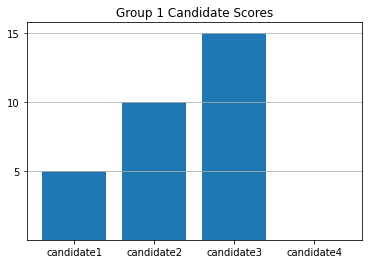

candidate1 {'sex': 0, 'age': 58, 'pol_ex_years': 5}
candidate2 {'sex': 1, 'age': 61, 'pol_ex_years': 15}
candidate3 {'sex': 0, 'age': 61, 'pol_ex_years': 15}
candidate4 {'sex': 1, 'age': 58, 'pol_ex_years': 5}


In [43]:
plt.bar(x=bias_scores_group1.keys(), height = bias_scores_group1.values())
plt.yticks([5,10,15])
plt.grid(axis="y", )
plt.title("Group 1 Candidate Scores")
plt.show()
for candidate in CANDIDATES:
    print(candidate, CANDIDATES[candidate])

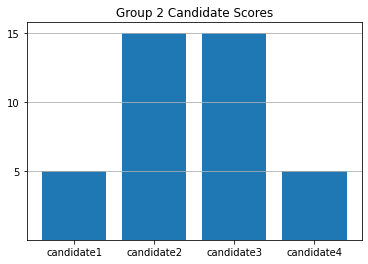

candidate1 {'sex': 0, 'age': 58, 'pol_ex_years': 5}
candidate2 {'sex': 1, 'age': 61, 'pol_ex_years': 15}
candidate3 {'sex': 0, 'age': 61, 'pol_ex_years': 15}
candidate4 {'sex': 1, 'age': 58, 'pol_ex_years': 5}


In [44]:
plt.bar(x=bias_scores_group2.keys(), height = bias_scores_group2.values())
plt.yticks([5,10,15])
plt.grid(axis="y", )
plt.title("Group 2 Candidate Scores")
plt.show()
for candidate in CANDIDATES:
    print(candidate, CANDIDATES[candidate])

In [52]:
prob_1 = np.array(list(bias_scores_group1.values())) / np.sum(list(bias_scores_group1.values()))

In [72]:
for n in range(n_group1):
    group1[n] = np.random.choice(list(CANDIDATES), p=prob1)

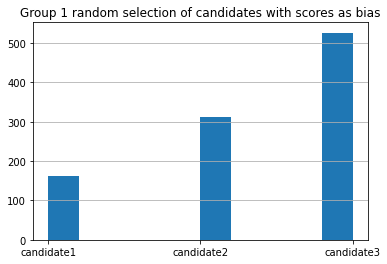

In [104]:
group1 = dict(sorted(group1.items(), key=lambda item: item[1]))
plt.hist(group1.values())
plt.grid(axis="y")
plt.title("Group 1 random selection of candidates with scores as bias")
plt.show()

In [84]:
prob2 = np.array(list(bias_scores_group2.values())) / np.sum(list(bias_scores_group2.values()))

In [85]:
for n in range(n_group2):
    group2[n] = np.random.choice(list(CANDIDATES), p=prob2)

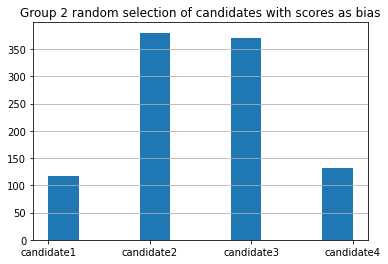

In [106]:
group2 = dict(sorted(group2.items(), key=lambda item: item[1]))
plt.hist(group2.values())
plt.grid(axis="y")
plt.title("Group 2 random selection of candidates with scores as bias")
plt.show()